## Visualization 2: Relationship between NBA Player of the Week and Player Salary

In [1]:
%load_ext rpy2.ipython
%R library(ggplot2)

import pandas as pd
import numpy as np
from utils import pd2r

In [2]:
## Player of week
POTW = pd2r(pd.read_csv('../data/raw/NBA_Player_of_the_Week.csv'))
POTW.tail(10)

Active season                 Player                    Team Conference  \
1177              1         Nikola Vucevic           Orlando Magic       East   
1178              1          Anthony Davis    New Orleans Pelicans       West   
1179              1          Pascal Siakam         Toronto Raptors       East   
1180              1          C.J. McCollum  Portland Trail Blazers       West   
1181              1         Victor Oladipo          Indiana Pacers       East   
1182              1      Russell Westbrook   Oklahoma City Thunder       West   
1183              1  Giannis Antetokounmpo         Milwaukee Bucks       East   
1184              1          Stephen Curry   Golden State Warriors       West   
1185              1           Kemba Walker       Charlotte Hornets       East   
1186              1           Nikola Jokic          Denver Nuggets       West   

              Date Position Height  Weight  Age  Draft Year  \
1177  Nov 19, 2018       PF    7-0     260   28        2011   
1178  Nov 19, 2018       PF   6-10     253   25        2012   
1179  Nov 12, 2018        F    6-9     230   25        2016   
1180  Nov 12, 2018        G    6-3     190   27        2013   
1181   Nov 5, 2018        G    6-4     210   26        2013   
1182   Nov 5, 2018        G    6-3     200   30        2008   
1183  Oct 29, 2018        F   6-11     242   24        2013   
1184  Oct 29, 2018        G    6-3     190   30        2009   
1185  Oct 22, 2018        G    6-1     184   28        2011   
1186  Oct 22, 2018        C    7-0     250   24        2014   

      Seasons in league     Season  Season short  Real_value  
1177                  7  2018-2019          2019         0.5  
1178                  6  2018-2019          2019         0.5  
1179                  2  2018-2019          2019         0.5  
1180                  5  2018-2019          2019         0.5  
1181                  5  2018-2019          2019         0.5  
1182                 10  2018-2019          2019         0.5  
1183                  5  2018-2019          2019         0.5  
1184                  9  2018-2019          2019         0.5  
1185                  7  2018-2019          2019         0.5  
1186                  3  2018-2019          2019         0.5

In [3]:
## Salary
pd.set_option('display.max_columns', 999)
SLR = pd2r(pd.read_csv('../data/cleaned/NBA_Salary.csv'))
SLR.head()

Player Name  Salary in $  Season End  Season Start Team           Franchise
0  A.C. Green      1750000        1991          1990  LAL  Los Angeles Lakers
1  A.C. Green      1750000        1992          1991  LAL  Los Angeles Lakers
2  A.C. Green      1750000        1993          1992  LAL  Los Angeles Lakers
3  A.C. Green      1885000        1994          1993  PHX        Phoenix Suns
4  A.C. Green      6472600        1995          1994  PHX        Phoenix Suns

In [4]:
## Summary
SUM = pd2r(pd.read_csv('../data/scraped/NBA_Yearly_Summary.csv'))
SUM.tail(15)

Year        League Champion   Most Valuable Player  \
20  2005      San Antonio Spurs             Steve Nash   
21  2006             Miami Heat             Steve Nash   
22  2007      San Antonio Spurs          Dirk Nowitzki   
23  2008         Boston Celtics            Kobe Bryant   
24  2009     Los Angeles Lakers           LeBron James   
25  2010     Los Angeles Lakers           LeBron James   
26  2011       Dallas Mavericks           Derrick Rose   
27  2012             Miami Heat           LeBron James   
28  2013             Miami Heat           LeBron James   
29  2014      San Antonio Spurs           Kevin Durant   
30  2015  Golden State Warriors          Stephen Curry   
31  2016    Cleveland Cavaliers          Stephen Curry   
32  2017  Golden State Warriors      Russell Westbrook   
33  2018  Golden State Warriors           James Harden   
34  2019        Toronto Raptors  Giannis Antetokounmpo   

         Rookie of the Year         PPG Leader        RPG Leader  \
20             Emeka Okafor      Allen Iverson     Kevin Garnett   
21               Chris Paul        Kobe Bryant     Kevin Garnett   
22              Brandon Roy        Kobe Bryant     Kevin Garnett   
23             Kevin Durant       LeBron James     Dwight Howard   
24             Derrick Rose        Dwyane Wade     Dwight Howard   
25             Tyreke Evans       Kevin Durant     Dwight Howard   
26            Blake Griffin       Kevin Durant        Kevin Love   
27             Kyrie Irving       Kevin Durant     Dwight Howard   
28           Damian Lillard    Carmelo Anthony     Dwight Howard   
29  Michael Carter-Williams       Kevin Durant    DeAndre Jordan   
30           Andrew Wiggins  Russell Westbrook    DeAndre Jordan   
31       Karl-Anthony Towns      Stephen Curry    Andre Drummond   
32          Malcolm Brogdon  Russell Westbrook  Hassan Whiteside   
33              Ben Simmons       James Harden    Andre Drummond   
34              Luka Dončić       James Harden    Andre Drummond   

           APG Leader      WS Leader  
20         Steve Nash  Kevin Garnett  
21         Steve Nash  Dirk Nowitzki  
22         Steve Nash  Dirk Nowitzki  
23         Chris Paul     Chris Paul  
24         Chris Paul   LeBron James  
25         Steve Nash   LeBron James  
26         Steve Nash   LeBron James  
27        Rajon Rondo   LeBron James  
28        Rajon Rondo   LeBron James  
29         Chris Paul   Kevin Durant  
30         Chris Paul   James Harden  
31        Rajon Rondo  Stephen Curry  
32       James Harden   James Harden  
33  Russell Westbrook   James Harden  
34  Russell Westbrook   James Harden

## POTW VS MVP

In [5]:
# How many times POTW does the player get for each year
POTW_count = POTW.groupby(['Season short','Player','Team']).count()['Date'].reset_index().rename(columns = {'Date': 'POTW_Count'})
POTW_count.head()

Season short            Player                  Team  POTW_Count
0          1985      Alex English        Denver Nuggets           1
1          1985      Bernard King       New York Knicks           1
2          1985       Calvin Natt        Denver Nuggets           1
3          1985  Darrell Griffith             Utah Jazz           1
4          1985       Derek Smith  Los Angeles Clippers           2

In [6]:
## MVP 
MVP = SUM[['Year', 'Most Valuable Player']]
MVP.head()

Year Most Valuable Player
0  1985           Larry Bird
1  1986           Larry Bird
2  1987        Magic Johnson
3  1988       Michael Jordan
4  1989        Magic Johnson

In [7]:
potw_mvp = pd.merge(POTW_count,MVP, left_on = 'Season short', right_on= 'Year',how = 'left')
potw_mvp.loc[potw_mvp['Most Valuable Player'] == potw_mvp['Player'], 'Is_MVP'] = 'Yes'
potw_mvp.loc[potw_mvp['Most Valuable Player'] != potw_mvp['Player'], 'Is_MVP'] = 'No'
potw_mvp_new = potw_mvp[['Year','Player','Team','POTW_Count','Is_MVP']].copy()
potw_mvp_new = potw_mvp_new.loc[potw_mvp_new.Year > 1990]

In [8]:
max_count = potw_mvp_new.groupby('Year').max()[['POTW_Count']].reset_index().rename(columns = {'POTW_Count': 'Max'})

In [9]:
potw_mvp_sum = pd.merge(max_count, potw_mvp_new, on = ['Year'])
potw_mvp_sum.loc[potw_mvp_sum.Max == potw_mvp_sum.POTW_Count, 'Is_Max'] = 'Yes'
potw_mvp_sum.loc[potw_mvp_sum.Max != potw_mvp_sum.POTW_Count, 'Is_Max'] = 'No'

In [10]:
potw_mvp_sum.loc[(potw_mvp_sum.Is_MVP == 'Yes') & (potw_mvp_sum.Is_Max == 'Yes'), 'Group'] = 'Both'
potw_mvp_sum.loc[(potw_mvp_sum.Is_MVP == 'Yes') & (potw_mvp_sum.Is_Max == 'No'), 'Group'] = 'Either'
potw_mvp_sum.loc[(potw_mvp_sum.Is_MVP == 'No') & (potw_mvp_sum.Is_Max == 'Yes'), 'Group'] = 'Either'
potw_mvp_sum.loc[(potw_mvp_sum.Is_MVP == 'No') & (potw_mvp_sum.Is_Max == 'No'), 'Group'] = 'Neither'

In [11]:
labeled_case = potw_mvp_sum.loc[potw_mvp_sum.Group != 'Neither']
labeled_players = ['LeBron James','Stephen Curry','Kobe Bryant','James Harden']
labeled_case = labeled_case.loc[labeled_case.Player.isin(labeled_players)]
labeled_case['year_name'] = labeled_case['Year'].astype(str) +  ', ' + labeled_case['Player']
labeled_case

Year  Max         Player                   Team  POTW_Count Is_MVP  \
238  2003    5    Kobe Bryant     Los Angeles Lakers           5     No   
332  2006    5    Kobe Bryant     Los Angeles Lakers           5     No   
333  2006    5   LeBron James    Cleveland Cavaliers           5     No   
394  2008    3    Kobe Bryant     Los Angeles Lakers           3    Yes   
395  2008    3   LeBron James    Cleveland Cavaliers           3     No   
421  2009    7   LeBron James    Cleveland Cavaliers           7    Yes   
444  2010    6   LeBron James    Cleveland Cavaliers           6    Yes   
487  2012    6   LeBron James             Miami Heat           6    Yes   
513  2013    6   LeBron James             Miami Heat           6    Yes   
564  2015    3   James Harden        Houston Rockets           3     No   
574  2015    3   LeBron James    Cleveland Cavaliers           3     No   
579  2015    3  Stephen Curry  Golden State Warriors           2    Yes   
600  2016    5   LeBron James    Cleveland Cavaliers           5     No   
607  2016    5  Stephen Curry  Golden State Warriors           5    Yes   
619  2017    4   James Harden        Houston Rockets           4     No   
628  2017    4   LeBron James    Cleveland Cavaliers           4     No   
643  2018    5   James Harden        Houston Rockets           5    Yes   

    Is_Max   Group            year_name  
238    Yes  Either    2003, Kobe Bryant  
332    Yes  Either    2006, Kobe Bryant  
333    Yes  Either   2006, LeBron James  
394    Yes    Both    2008, Kobe Bryant  
395    Yes  Either   2008, LeBron James  
421    Yes    Both   2009, LeBron James  
444    Yes    Both   2010, LeBron James  
487    Yes    Both   2012, LeBron James  
513    Yes    Both   2013, LeBron James  
564    Yes  Either   2015, James Harden  
574    Yes  Either   2015, LeBron James  
579     No  Either  2015, Stephen Curry  
600    Yes  Either   2016, LeBron James  
607    Yes    Both  2016, Stephen Curry  
619    Yes  Either   2017, James Harden  
628    Yes  Either   2017, LeBron James  
643    Yes    Both   2018, James Harden

In [12]:
# labeled_case = (potw_mvp_sum.loc[(potw_mvp_sum.Year > 2000) & 
#                                 (potw_mvp_sum.Group == 'Either')].copy())
# labeled_case['year_name'] = labeled_case['Year'].astype(str) +  ', ' + labeled_case['Player']
# labeled_case.head()

In [13]:
%R -i potw_mvp_sum
%R -i labeled_case

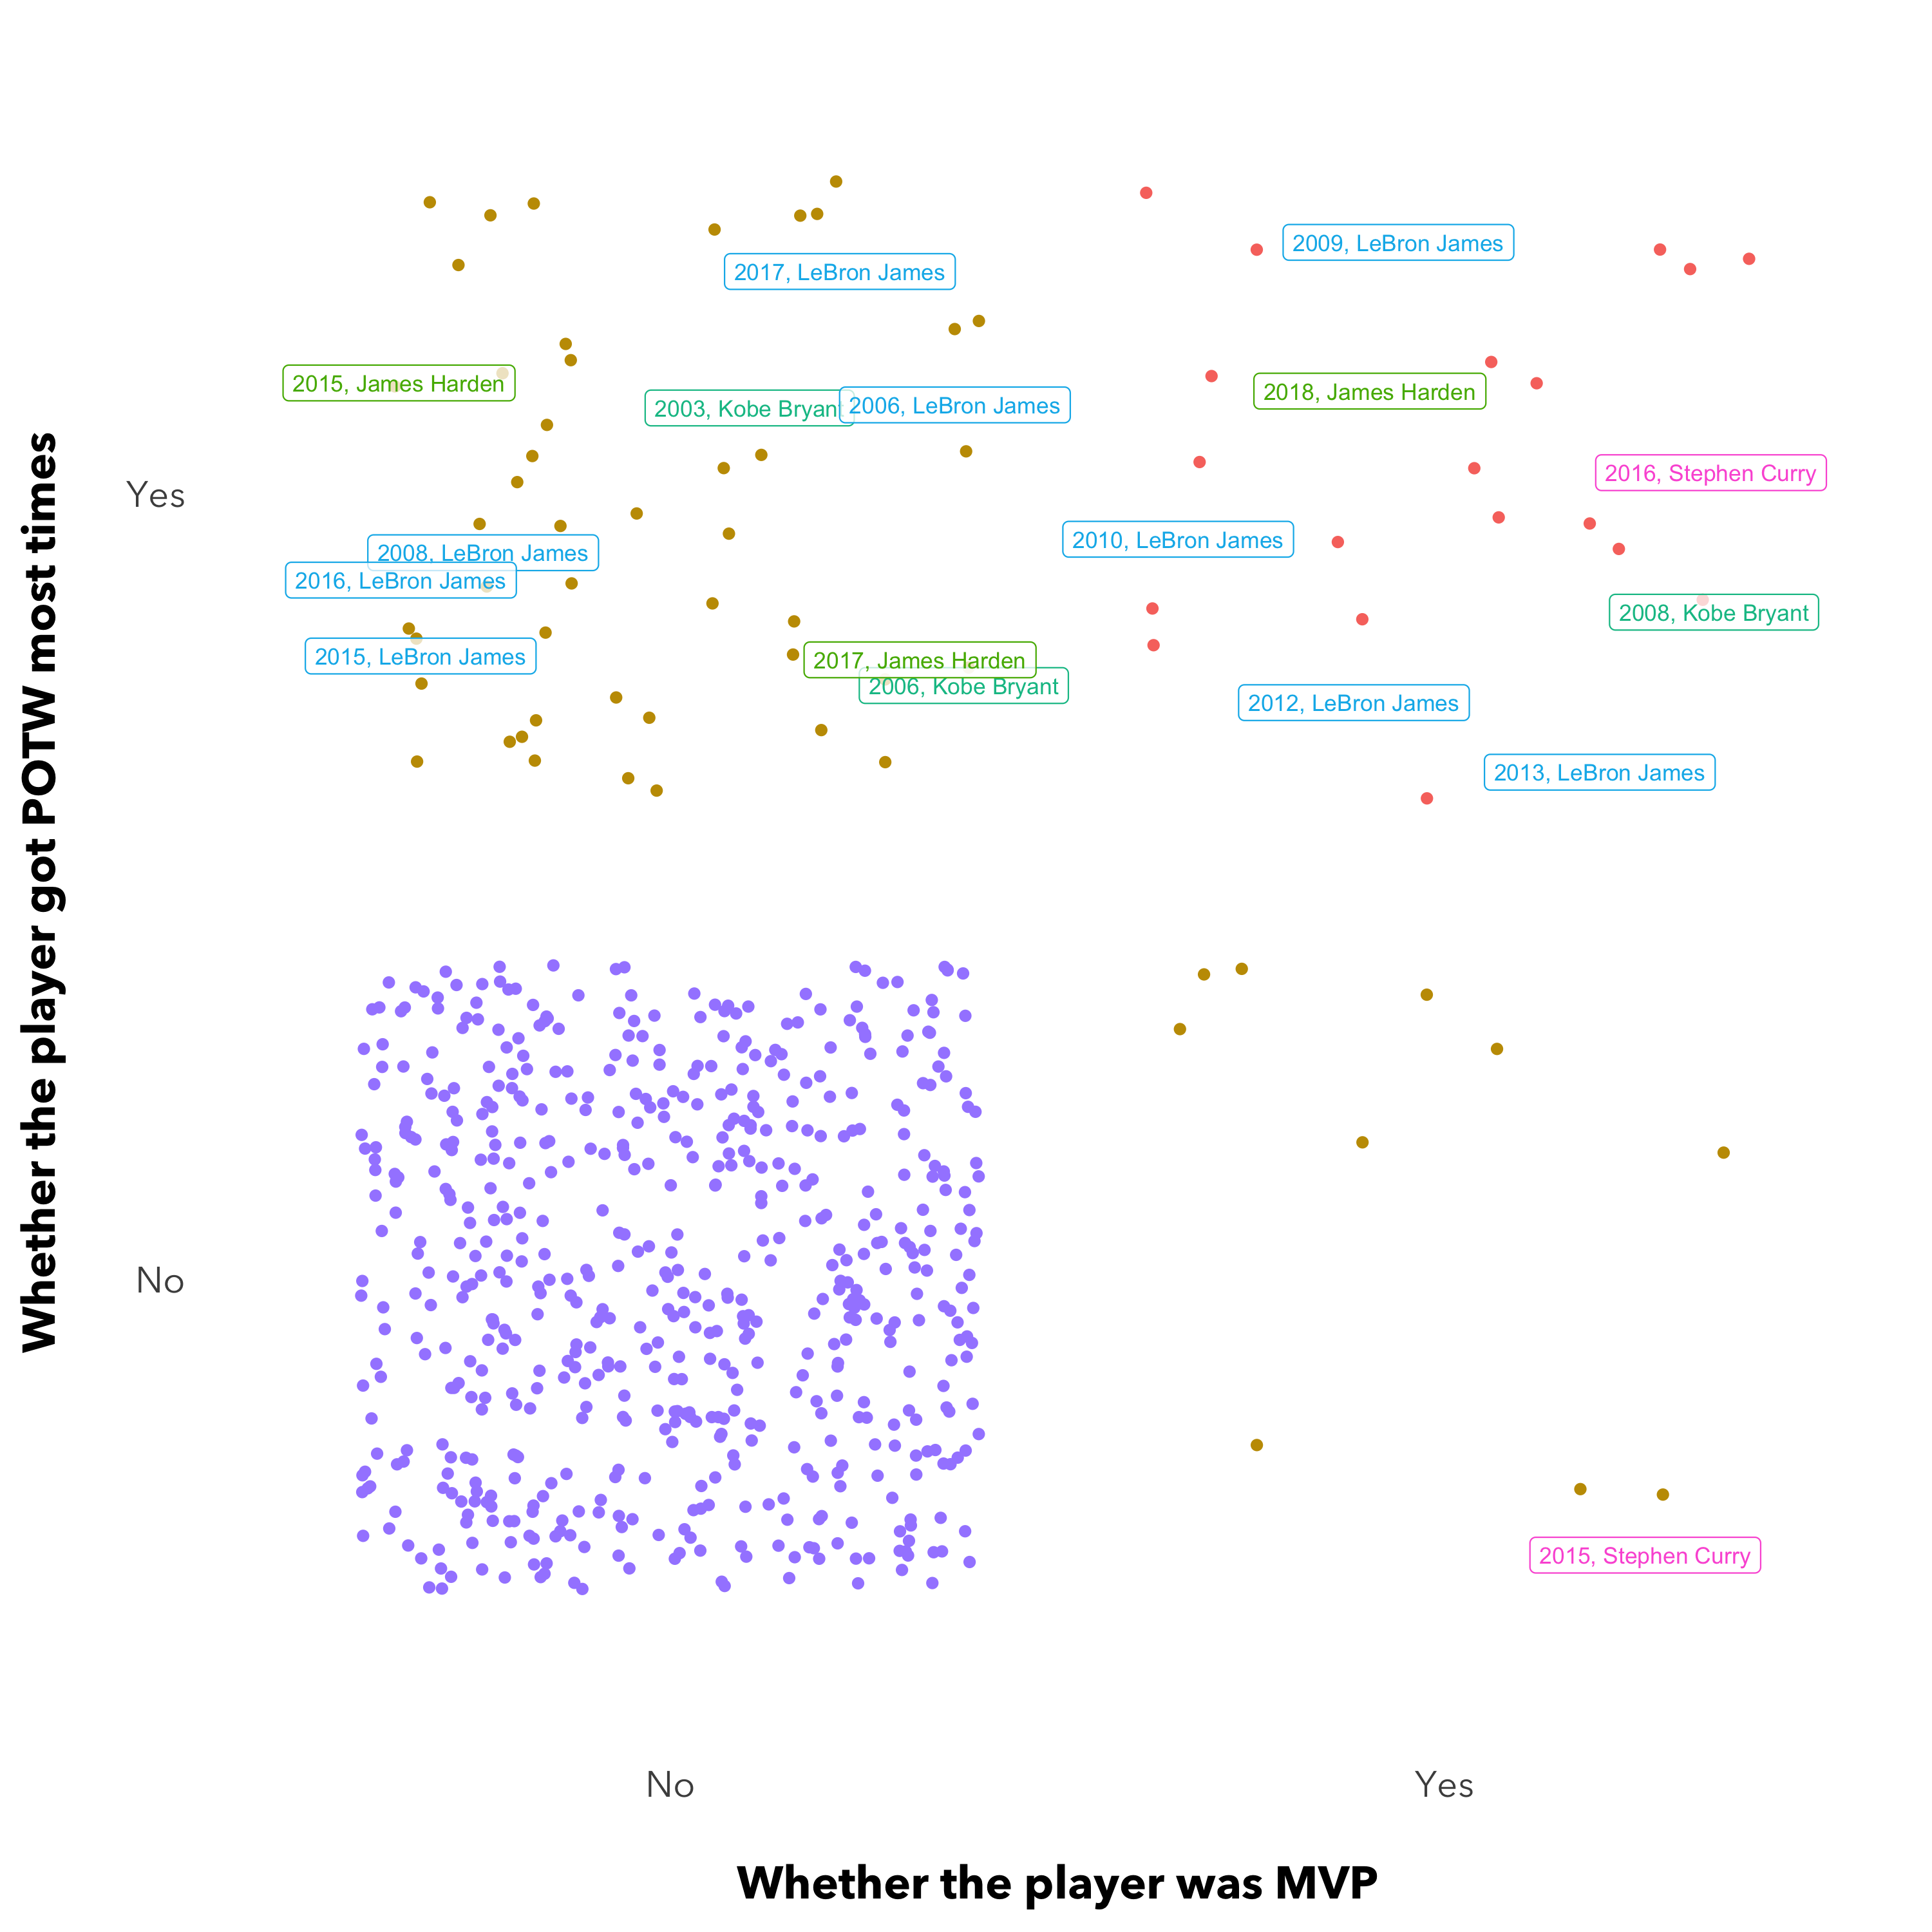

In [14]:
%%R -w 10 -h 10 --units in -r 300
(ggplot() + geom_jitter(aes(x = Is_MVP, y = Is_Max,color = Group), data = potw_mvp_sum) +
 theme_minimal(base_size = 17) +
 guides(colour = F) +
 geom_label(aes(x = Is_MVP, y = Is_Max, label = year_name, color = Player), 
            data = labeled_case, position = 'jitter', size = 3, alpha = 0.75) +
 ylab("Whether the player got POTW most times \n") + 
 xlab("\nWhether the player was MVP") +
 theme(text = element_text(family = 'Avenir Next'),
      axis.title = element_text(face = 'bold'),
       panel.grid.major = element_blank(),
       panel.grid.minor = element_blank())
)

## POW VS Salary

In [15]:
slr_new = SLR.drop(columns = ['Season Start', 'Team'])
slr_potw = pd.merge(slr_new, POTW_count, left_on=['Player Name', 'Season End'], right_on=['Player','Season short'], how = 'left')
slr_potw.head()

Player Name  Salary in $  Season End           Franchise  Season short  \
0  A.C. Green      1750000        1991  Los Angeles Lakers           NaN   
1  A.C. Green      1750000        1992  Los Angeles Lakers           NaN   
2  A.C. Green      1750000        1993  Los Angeles Lakers           NaN   
3  A.C. Green      1885000        1994        Phoenix Suns           NaN   
4  A.C. Green      6472600        1995        Phoenix Suns           NaN   

  Player Team  POTW_Count  
0    NaN  NaN         NaN  
1    NaN  NaN         NaN  
2    NaN  NaN         NaN  
3    NaN  NaN         NaN  
4    NaN  NaN         NaN

In [16]:
slr_potw.loc[slr_potw.Player.isna(), 'POTW_Count'] = 0
slr_potw['POTW_Count'] = slr_potw['POTW_Count']
slr_potw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12415 entries, 0 to 12414
Data columns (total 8 columns):
Player Name     12415 non-null object
Salary in $     12415 non-null int64
Season End      12415 non-null int64
Franchise       12415 non-null object
Season short    600 non-null float64
Player          600 non-null object
Team            600 non-null object
POTW_Count      12415 non-null float64
dtypes: float64(2), int64(2), object(4)
memory usage: 872.9+ KB


In [17]:
slr_potw_new = slr_potw.drop(columns= ['Season short','Player','Team']).rename(columns = {'Player Name': 'Player', 'Season End':'Year','Salary in $':'Salary'})
slr_potw_new['Salary'] = round(slr_potw_new['Salary'] /1000000, 2)
slr_potw_new.head()

Player  Salary  Year           Franchise  POTW_Count
0  A.C. Green    1.75  1991  Los Angeles Lakers         0.0
1  A.C. Green    1.75  1992  Los Angeles Lakers         0.0
2  A.C. Green    1.75  1993  Los Angeles Lakers         0.0
3  A.C. Green    1.88  1994        Phoenix Suns         0.0
4  A.C. Green    6.47  1995        Phoenix Suns         0.0

In [18]:
slr_potw_new.loc[(slr_potw_new.Year < 2000) & (slr_potw_new.Salary > 20)]

Player  Salary  Year        Franchise  POTW_Count
8027  Michael Jordan   30.14  1997    Chicago Bulls         0.0
8028  Michael Jordan   33.14  1998    Chicago Bulls         3.0
8739   Patrick Ewing   20.50  1998  New York Knicks         0.0

In [19]:
slr_potw_median = slr_potw_new.groupby('Year')[['Salary']].median().reset_index()
slr_potw_median.head()

Year  Salary
0  1991   0.650
1  1992   0.740
2  1993   0.810
3  1994   1.075
4  1995   1.100

In [20]:
slr_potw_new.loc[slr_potw_new.POTW_Count == 0, 'Is_POTW'] = 'No'
slr_potw_new.loc[slr_potw_new.POTW_Count != 0, 'Is_POTW'] = 'Yes'
slr_vs_count = slr_potw_new.groupby(['Year','Is_POTW'])[['Salary']].median().reset_index()
slr_vs_count.tail(15)

Year Is_POTW  Salary
43  2012     Yes  13.460
44  2013      No   2.305
45  2013     Yes  12.000
46  2014      No   2.950
47  2014     Yes   9.050
48  2015      No   1.790
49  2015     Yes  14.215
50  2016      No   1.945
51  2016     Yes  14.730
52  2017      No   1.875
53  2017     Yes  17.640
54  2018      No   2.735
55  2018     Yes  21.965
56  2019      No   2.390
57  2019     Yes  23.240

In [21]:
potw_player_salary = slr_potw_new.loc[slr_potw_new.Is_POTW == 'Yes']
Not_potw_player_salary = slr_potw_new.loc[slr_potw_new.Is_POTW == 'No']
potw_player_salary.head()

Player  Salary  Year               Franchise  POTW_Count Is_POTW
147  Al Harrington    9.23  2009         New York Knicks         1.0     Yes
160     Al Horford   12.00  2013           Atlanta Hawks         1.0     Yes
162     Al Horford   12.00  2015           Atlanta Hawks         2.0     Yes
168   Al Jefferson    2.48  2008  Minnesota Timberwolves         1.0     Yes
169   Al Jefferson   11.00  2009  Minnesota Timberwolves         1.0     Yes

In [22]:
annote_slr_potw = slr_vs_count.loc[(slr_vs_count.Year == 2019) | (slr_vs_count.Year == 1991) 
                    | ((slr_vs_count.Year == 2014) &  (slr_vs_count.Is_POTW == 'Yes'))]
annote_slr_potw

Year Is_POTW  Salary
0   1991      No    0.62
1   1991     Yes    1.37
47  2014     Yes    9.05
56  2019      No    2.39
57  2019     Yes   23.24

In [23]:
%R -i slr_potw_median
%R -i slr_vs_count
%R -i annote_slr_potw
%R -i potw_player_salary
%R -i Not_potw_player_salary

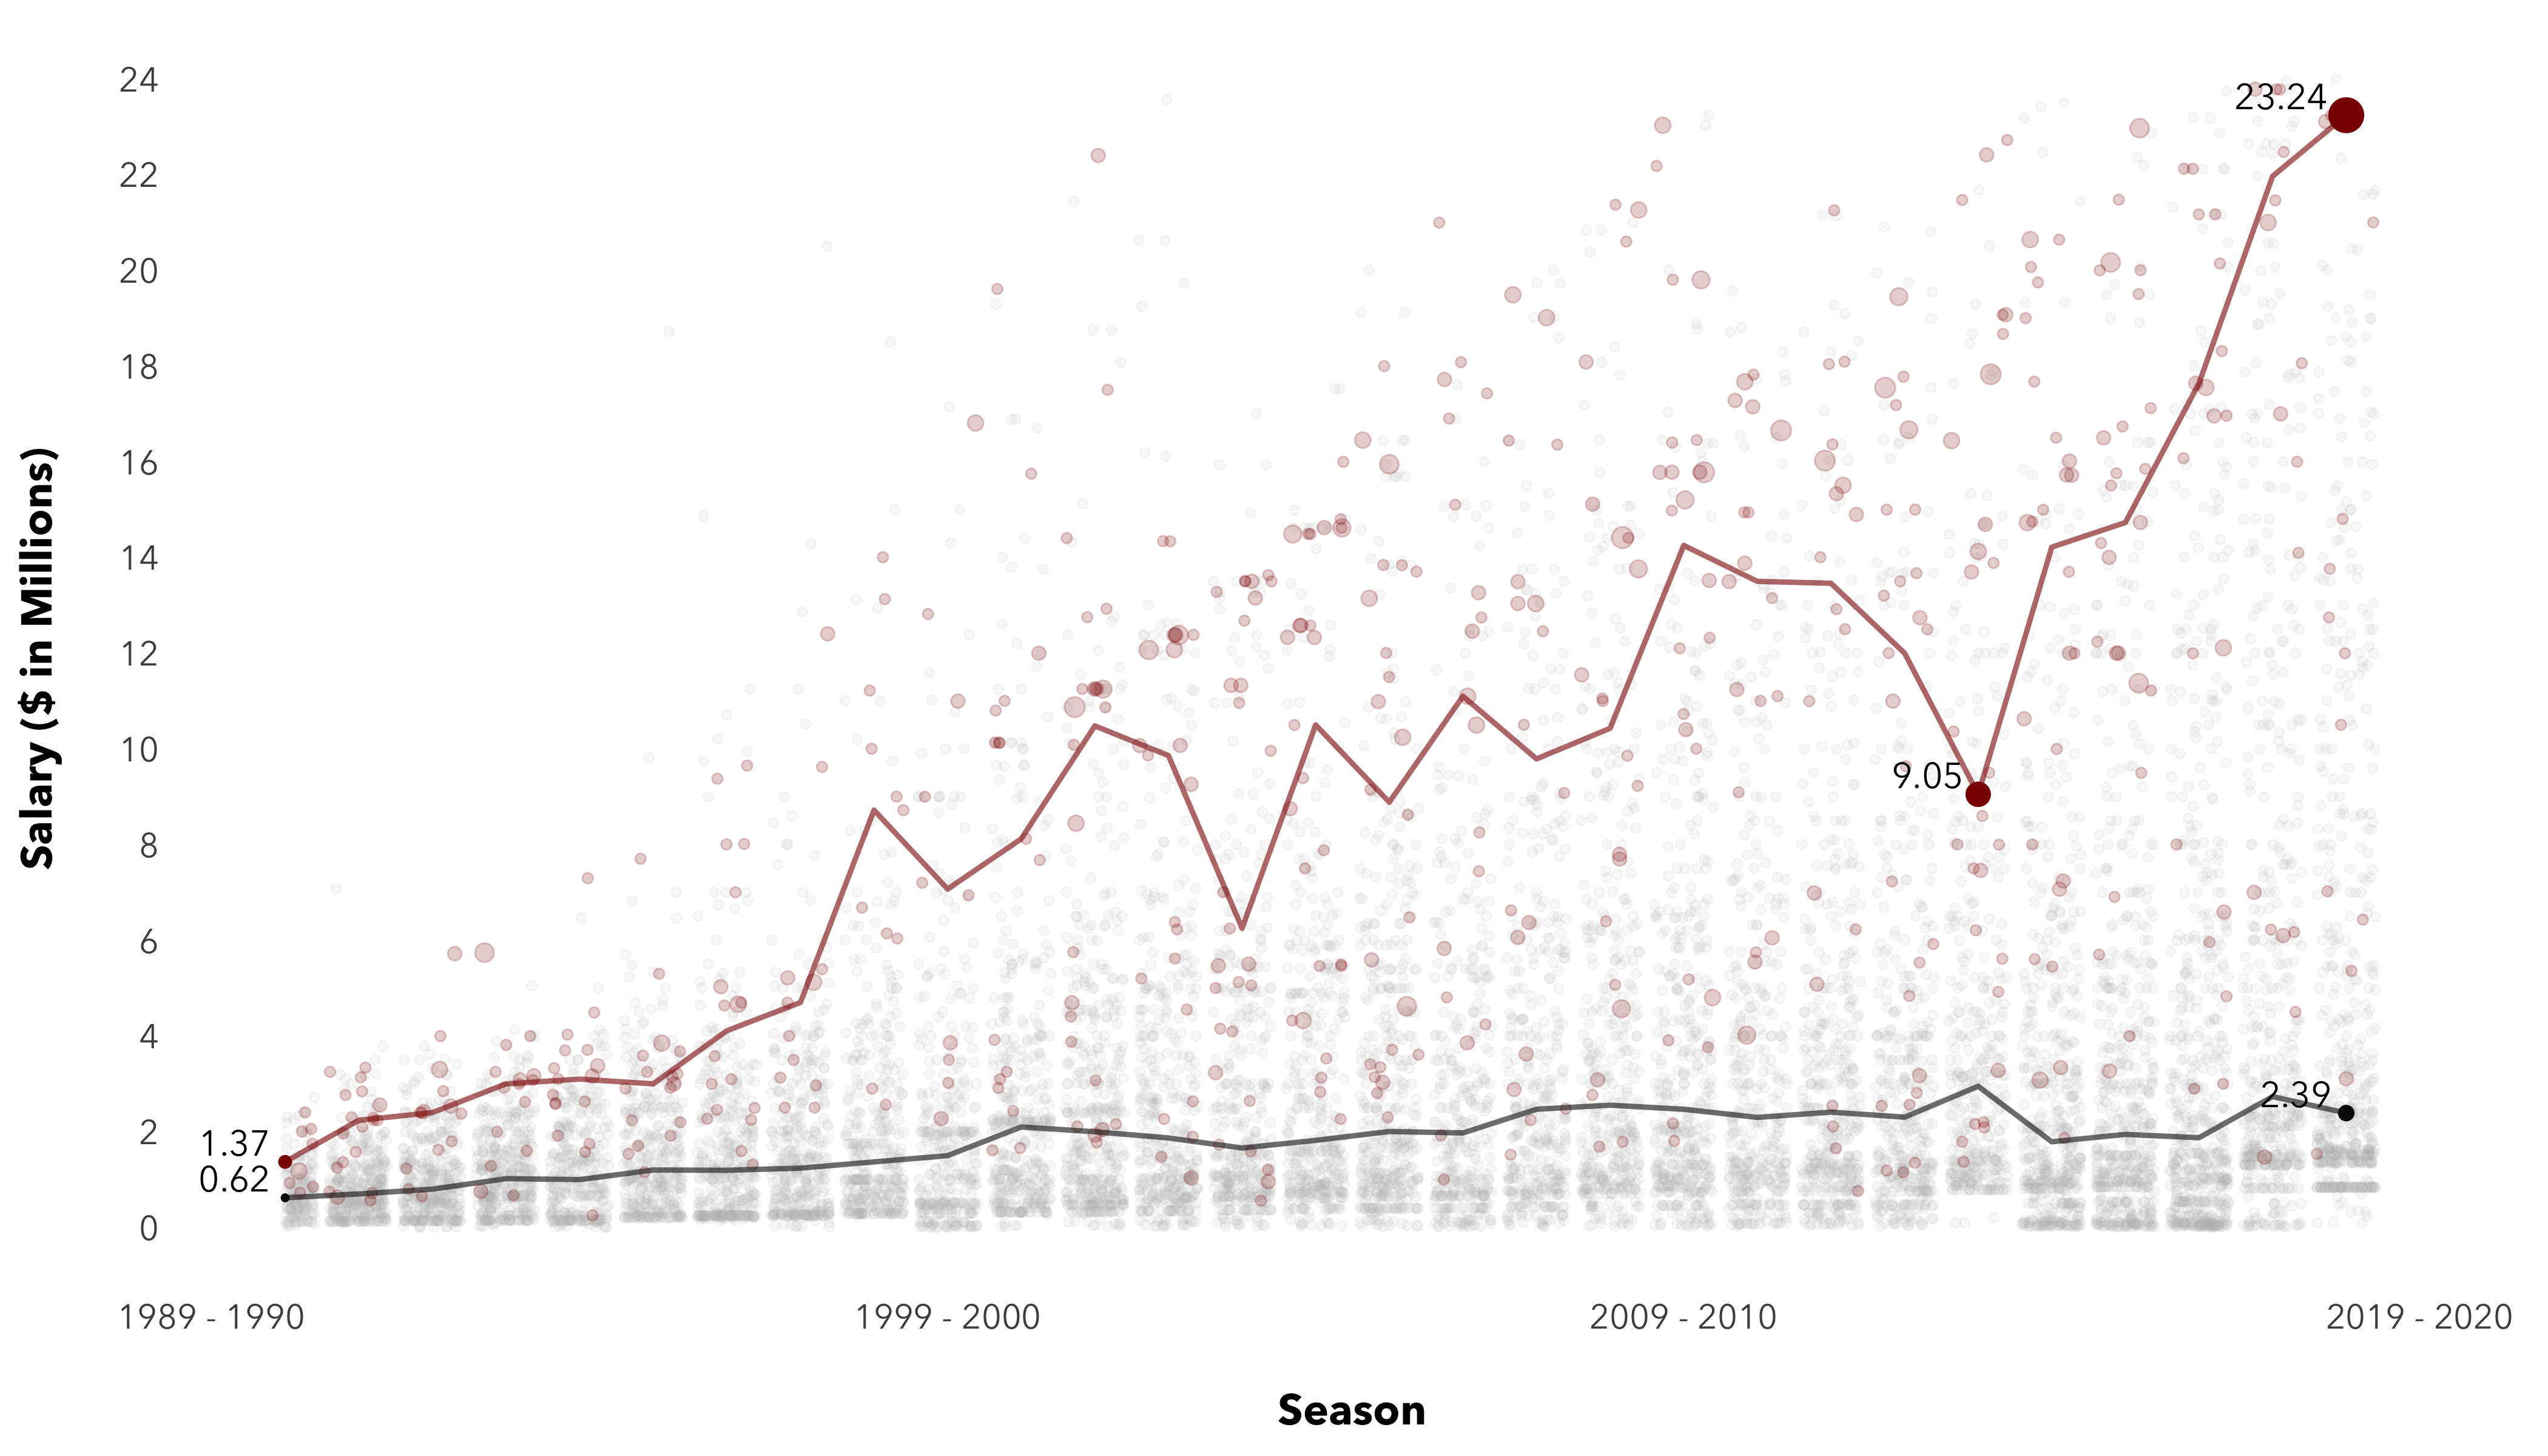

In [24]:
%%R -w 14 -h 8 --units in -r 300
season <- function(x) {
    paste(x - 1, '-', x)
}

ggplot() +
geom_jitter(aes(x = Year, y = Salary), data = Not_potw_player_salary, color = 'grey', alpha = 0.1) +
geom_jitter(aes(x = Year, y = Salary, size = POTW_Count), data = potw_player_salary, color = 'red4',alpha = 0.2) +
theme_minimal(base_size = 17) +
geom_line(aes(x = Year, y = Salary, color = Is_POTW), data = slr_vs_count, alpha = 0.6, size = 1) +
scale_color_manual(values=c("grey4", "red4")) +
geom_point(aes(x = Year, y = Salary, color = Is_POTW, size = Salary), data = annote_slr_potw,  position = "dodge") +
geom_text(aes(x = Year, y = Salary, label = Salary),
          size = 5, data = annote_slr_potw, vjust = -0.25, hjust = 1.2, family = 'Avenir Next') +
xlab("\nYear") + 
ylab("Salary ($ in Millions) \n") +
# scale_colour_gradient(low = 'snow2', high = 'steelblue') +
scale_x_continuous(limits = c(1991, 2020), name = "\nSeason", label = season) +
scale_y_continuous(limits = c(0, 24), breaks = seq(0, 24, by = 2)) +
theme(text = element_text(family = 'Avenir Next'),
      axis.title = element_text(face = 'bold'), axis.ticks = element_blank(),
      axis.line = element_blank(),
      panel.grid.major = element_blank(),
      panel.grid.minor = element_blank()) +
guides(colour = F, size = F)

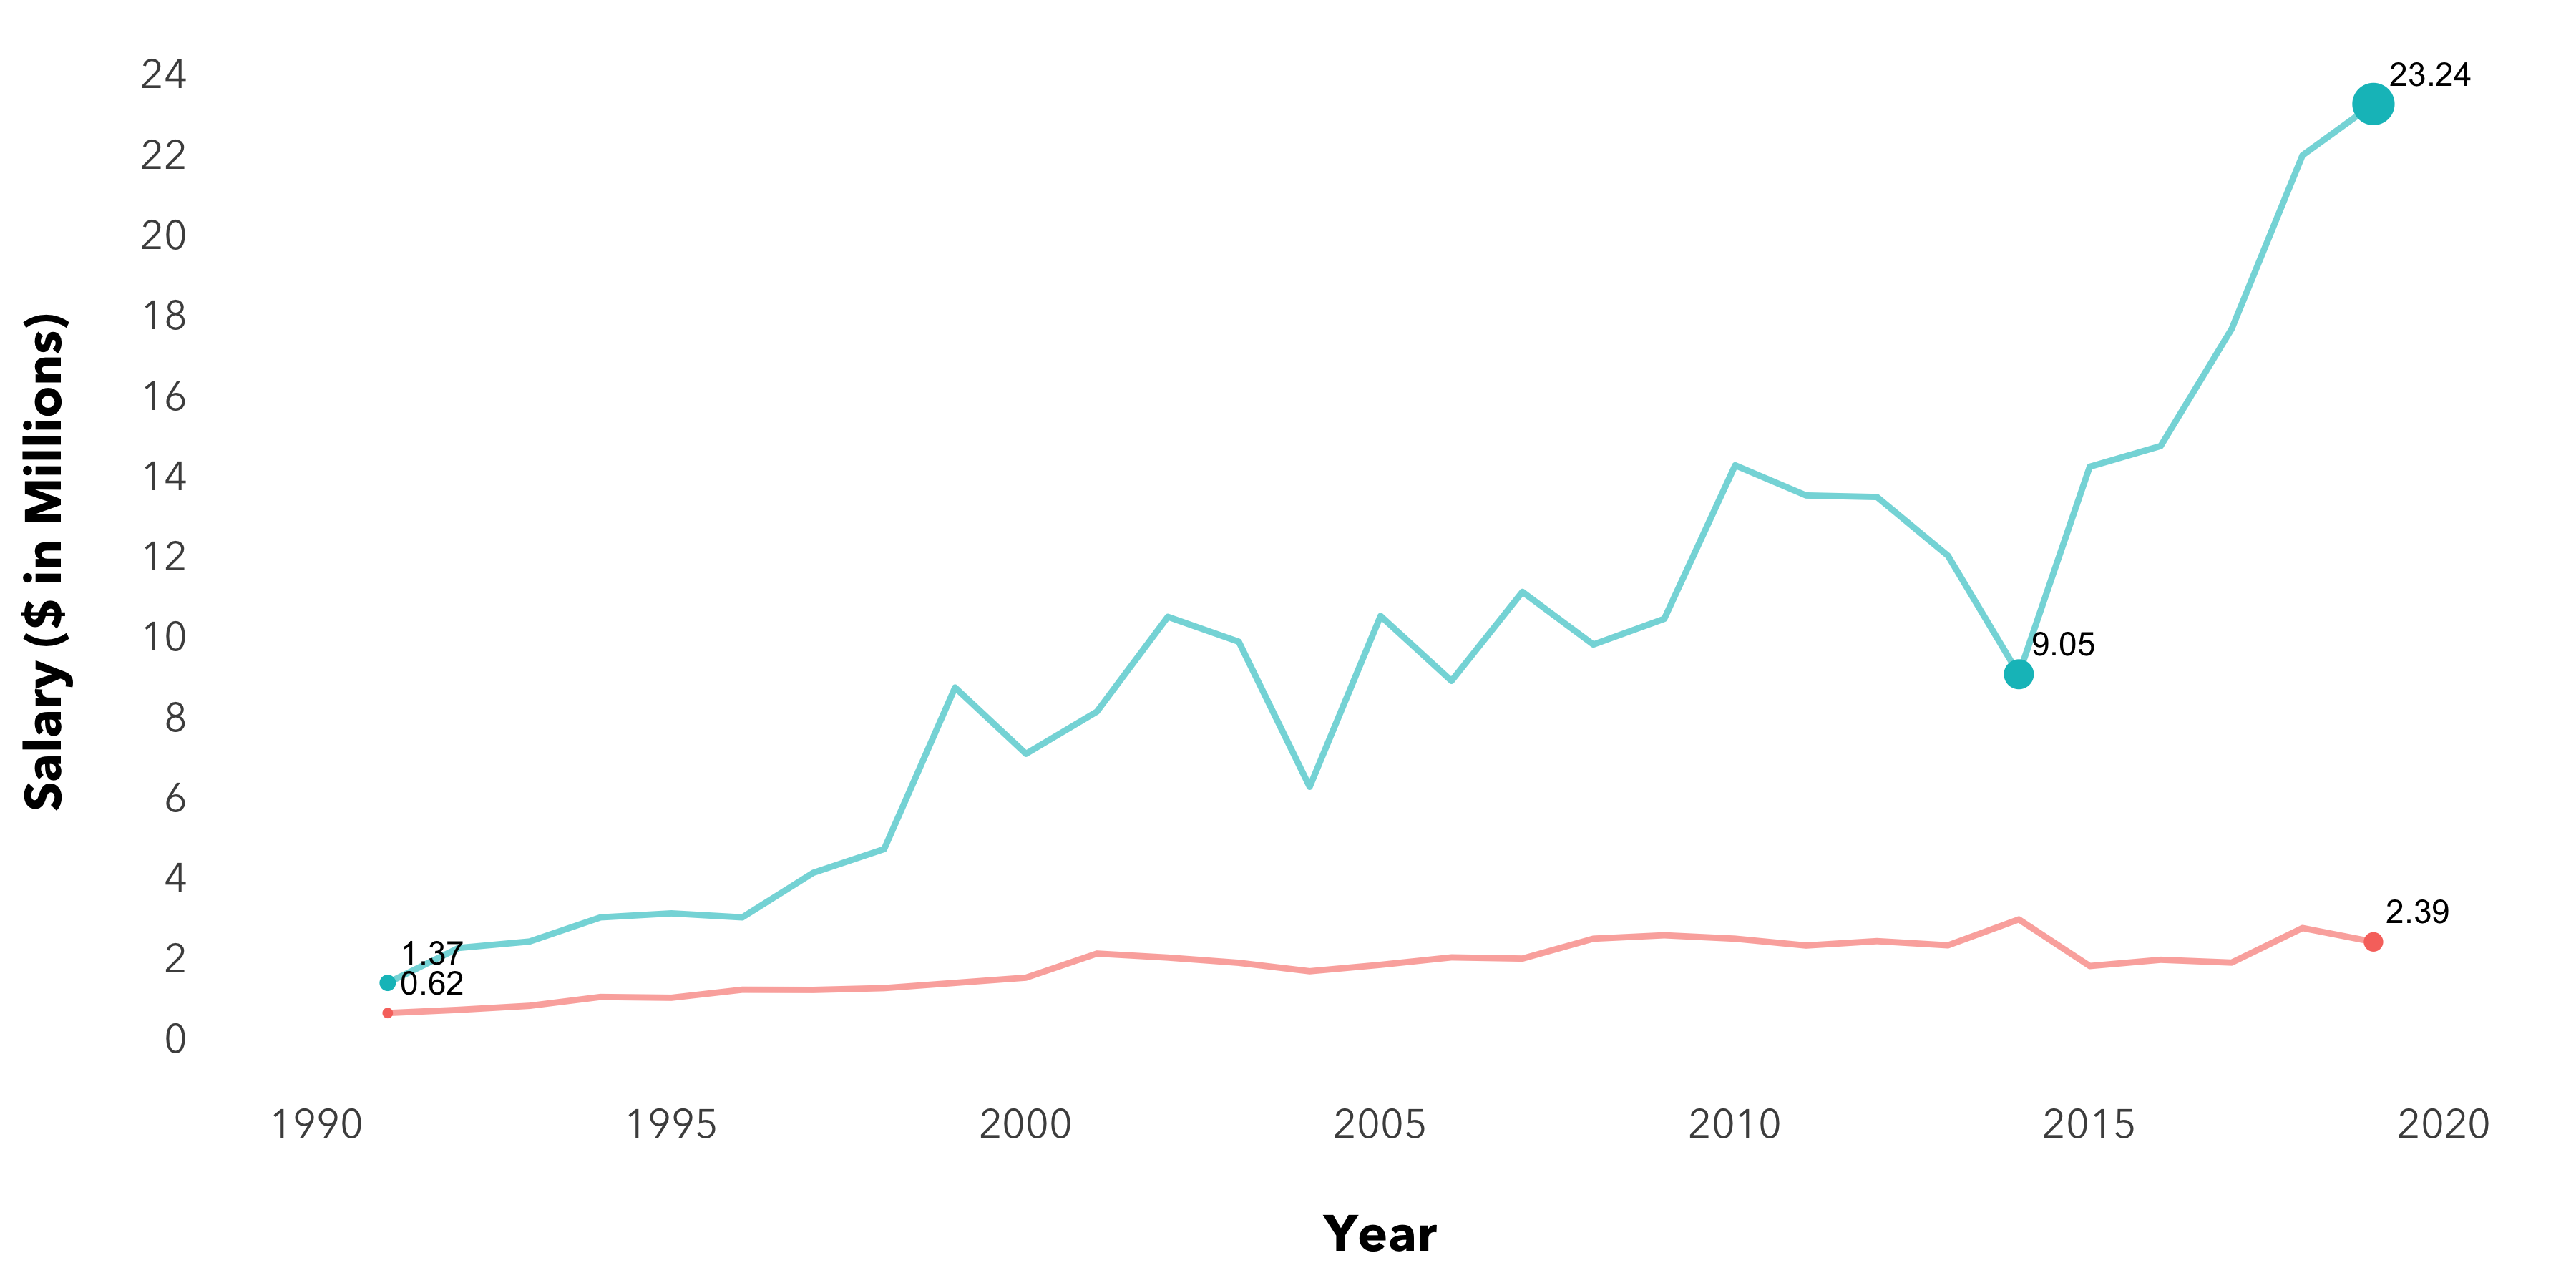

In [25]:
%%R -w 12 -h 6 --units in -r 300
ggplot() +
geom_line(aes(x = Year, y = Salary, color = Is_POTW), data = slr_vs_count, alpha = 0.6, size = 1) +
theme_minimal(base_size = 17) +
# geom_line(aes(x = Year, y = Salary), data = slr_potw_median, stat = "identity", color = 'green', size = 1, alpha = 0.6) +
geom_point(aes(x = Year, y = Salary, color = Is_POTW, size = Salary), data = annote_slr_potw,  position = "dodge") +
geom_text(aes(x = Year, y = Salary, label = Salary), data = annote_slr_potw, vjust = -0.8, hjust = -0.2) +
xlab("\nYear") + 
ylab("Salary ($ in Millions) \n") +
scale_x_continuous(limits = c(1990, 2020), breaks = seq(1990, 2020, by = 5)) +
scale_y_continuous(limits = c(0, 24), breaks = seq(0, 24, by = 2)) +
# scale_colour_gradient(low = 'snow2', high = 'steelblue') +
theme(text = element_text(family = 'Avenir Next'),
      axis.title = element_text(face = 'bold'),
      panel.grid.major = element_blank(),
      panel.grid.minor = element_blank()) +
guides(colour = F, size = F)